In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('repair2.csv')

# 날짜 형식 변환
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# 1970년 데이터만 추출
df['year'] = df['datetime'].dt.year
df2 = df[df['year'] == 1970].sort_values(['caseID', 'datetime', 'taskID']).reset_index(drop=True)

df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               12383 non-null  int64         
 1   taskID               12381 non-null  object        
 2   originator           12381 non-null  object        
 3   eventtype            12379 non-null  object        
 4   contact              946 non-null    object        
 5   RepairType           853 non-null    object        
 6   objectKey            853 non-null    float64       
 7   RepairInternally     869 non-null    object        
 8   EstimatedRepairTime  869 non-null    float64       
 9   RepairCode           869 non-null    float64       
 10  RepairOK             1728 non-null   object        
 11  date                 12383 non-null  object        
 12  time                 12383 non-null  object        
 13  datetime             12383 non-

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
0,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:08,1970-01-02 08:08:00,1970.0
1,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:11,1970-01-02 08:11:00,1970.0
2,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02,8:11,1970-01-02 08:11:00,1970.0
3,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16,1970-01-02 08:16:00,1970.0
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,8:16,1970-01-02 08:16:00,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12378,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,14:34,1970-01-19 14:34:00,1970.0
12379,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,18:34,1970-01-19 18:34:00,1970.0
12380,1000,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,18:34,1970-01-19 18:34:00,1970.0
12381,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25,1970-01-20 02:25:00,1970.0


### 1. 결측치 확인
- contact, RepairType, objectKey, RepairInternally, EstimatedRepairTime, RepairCode, RepairOK 컬럼에 결측치가 많은 이유 탐색

In [132]:
def show_value_counts(task, col):
    print(df2[df2['taskID'] == task]['eventtype'].value_counts())
    print(df2[df2[col].isna() == False][['taskID', 'eventtype']].value_counts())

- contact (taskID가 FirstContact일때만 값이 존재하는 것으로 추정)
    - complete 이벤트 밖에 없음
    - 따라서 contact 컬럼은 FirstContact일때만 값이 존재

In [134]:
show_value_counts('FirstContact', 'contact')

eventtype
complete    945
Name: count, dtype: int64
taskID        eventtype
FirstContact  complete     945
Name: count, dtype: int64


- RepairType (taskID가 MakeTicket일때만 값이 존재하는 것으로 추정)
    - start와 complete로 나뉘어 있음
    - 따라서 RepairType은 MakeTicket이 complete일때만 존재

In [135]:
show_value_counts('MakeTicket', 'RepairType')

eventtype
start       867
complete    853
Name: count, dtype: int64
taskID      eventtype
MakeTicket  complete     853
Name: count, dtype: int64


- objectKey (taskID가 MakeTicket일때만 값이 존재하는 것으로 추정)
    - start와 complete로 나뉘어 있음
    - 따라서 objectKey는 MakeTicket이 complete일때만 존재

In [136]:
show_value_counts('MakeTicket', 'objectKey')

eventtype
start       867
complete    853
Name: count, dtype: int64
taskID      eventtype
MakeTicket  complete     853
Name: count, dtype: int64


- RepairInternally (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - start와 complete로 나뉘어 있음
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [137]:
show_value_counts('Survey', 'RepairInternally')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- EstimatedRepairTime (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - start와 complete로 나뉘어 있음
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [138]:
show_value_counts('Survey', 'EstimatedRepairTime')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- RepairCode (taskID가 Survey일때만 값이 존재하는 것으로 추정)
    - start와 complete로 나뉘어 있음
    - 따라서 RepairInternally는 Survey가 complete일때만 존재

In [139]:
show_value_counts('Survey', 'RepairCode')

eventtype
complete    868
start       864
Name: count, dtype: int64
taskID  eventtype
Survey  complete     868
Name: count, dtype: int64


- RepairOK (taskID가 RepairReady, ReadyInformClient일때만 값이 존재하는 것으로 추정)
    - RepairReady, ReadyInformClient 둘 다 complete만 있음
    - 따라서 RepairOK는 RepairReady와 ReadyInformClient일때만 존재

In [150]:
print(df2[df2['taskID'] == 'RepairReady']['eventtype'].value_counts()) # complete만 존재
print(df2[df2['taskID'] == 'ReadyInformClient']['eventtype'].value_counts()) # complete만 존재
print(df2[df2['taskID'].isin(['RepairReady', 'ReadyInformClient'])][['taskID', 'eventtype', 'RepairOK']].value_counts())

eventtype
complete    858
Name: count, dtype: int64
eventtype
complete    870
Name: count, dtype: int64
taskID             eventtype  RepairOK
ReadyInformClient  complete   True        870
RepairReady        complete   True        858
Name: count, dtype: int64


### 1. 프로세스 순서 파악

In [2]:
# start가 있는 태스크와 없는 태스크 분리
start_complete_task = []
only_complete_task = []

for task in df2['taskID'].unique()[:-1]:
    values = df[df['taskID'] == task]['eventtype'].value_counts().index
    if 'start' in values:
        start_complete_task.append(task)
    else:
        only_complete_task.append(task)

print(f"start가 있는 태스크 : {start_complete_task}")
print(f"complete만 있는 태스크 : {only_complete_task}")

start가 있는 태스크 : ['MakeTicket', 'ArrangeSurvey', 'Survey', 'InternRepair', 'ImmediateRepair', 'ExternRepair']
complete만 있는 태스크 : ['InformClientSurvey', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady', 'FirstContact', 'InformClientWrongPlace']


In [3]:
process_dict = dict()

for i in range(len(df2)):
    key = df2.loc[i, 'caseID']
    task = df2.loc[i, 'taskID']
    event = df2.loc[i, 'eventtype']
    if key not in process_dict:
        process_dict[key] = []
    if ((task in start_complete_task) and (event == 'start')) or (task in only_complete_task):
        process_dict[key].append(task)

process_dict

{1: ['MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'InternRepair',
  'RepairReady',
  'SendTicketToFinAdmin',
  'ReadyInformClient',
  'TicketReady'],
 2: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'ExternRepair',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 3: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'InternRepair',
  'RepairReady',
  'SendTicketToFinAdmin',
  'ReadyInformClient',
  'TicketReady'],
 4: ['FirstContact',
  'MakeTicket',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'RepairReady',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 5: ['FirstContact',
  'MakeTicket',
  'ArrangeSurvey',
  'InformClientSurvey',
  'Survey',
  'ImmediateRepair',
  'RepairReady',
  'ReadyInformClient',
  'SendTicketToFinAdmin',
  'TicketReady'],
 6: ['FirstContact', 'InformClientWrongPlace'],
 7: ['Fir

In [4]:
process_flow = []

for key in process_dict:
    process_flow.append(process_dict[key])

processSR = pd.Series(process_flow)
process_count = processSR.value_counts()
for i in process_count.items():
    print(i)

# 프로세스가 정상적으로 이루어지면 10개의 과정을 거치는 것 같고 실패하면 2개의 과정을 거치는 걸로 보임
# 나머지들은 결측치가 제거되면서 누락된 프로세스가 있는 것으로 보임
# 따라서 10개 또는 2개의 프로세스가 있는 상위 6개의 경우만 보도록 결정

(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady', 'ReadyInformClient', 'SendTicketToFinAdmin', 'TicketReady'], 110)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'InternRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 109)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ImmediateRepair', 'RepairReady', 'ReadyInformClient', 'SendTicketToFinAdmin', 'TicketReady'], 89)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ImmediateRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 72)
(['FirstContact', 'InformClientWrongPlace'], 63)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformClientSurvey', 'Survey', 'ExternRepair', 'RepairReady', 'SendTicketToFinAdmin', 'ReadyInformClient', 'TicketReady'], 20)
(['FirstContact', 'MakeTicket', 'ArrangeSurvey', 'InformCl

In [5]:
process_count[:6]
# FirstContact -> MakeTicket -> ArrangeSurvey -> InformClientSurvey -> Survey 까지는 모두 동일한 프로세스를 거치는 것 같음
# 이후에는 InternRepair, ImmediateRepair, ExternRepair로 분기가 나뉘고 RepairReady를 거침
# 이후에는 ReadyInformClient -> SendTicketToFinAdmin 또는 SendTicketToFinAdmin -> ReadyInformClient의 순서를 거치고 마지막에 TicketReady인 것으로 보임
# 모종의 이유로 수리 요청 프로세스가 취소되면 FirstContact -> InformClientWrongPlace를 거치는 것 같음

[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, InternRepair, RepairReady, ReadyInformClient, SendTicketToFinAdmin, TicketReady]       110
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, InternRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]       109
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ImmediateRepair, RepairReady, ReadyInformClient, SendTicketToFinAdmin, TicketReady]     89
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ImmediateRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]     72
[FirstContact, InformClientWrongPlace]                                                                                                                        63
[FirstContact, MakeTicket, ArrangeSurvey, InformClientSurvey, Survey, ExternRepair, RepairReady, SendTicketToFinAdmin, ReadyInformClient, TicketReady]        20
Name: count, dtype: int64

### 2. 프로세스 소요 시간 파악

In [6]:
# 위의 프로세스에 해당하는 caseID만 추출하여 데이터프레임 재구성
index_set = set()
for key in process_dict:
    if process_dict[key] in process_count[:6].index.tolist():
        index_set.add(key)

df3 = df2[df2['caseID'].isin(index_set)]
df3

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
26,3,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:03,1970-01-03 01:03:00,1970.0
27,3,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:03,1970-01-03 01:03:00,1970.0
28,3,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:10,1970-01-03 01:10:00,1970.0
29,3,MakeTicket,Dian,complete,NaN,E,3844.0,NaN,NaN,NaN,NaN,1970-01-03,1:10,1970-01-03 01:10:00,1970.0
30,3,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,1:14,1970-01-03 01:14:00,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,998,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,10:34,1970-01-19 10:34:00,1970.0
12353,998,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,10:34,1970-01-19 10:34:00,1970.0
12354,998,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,11:44,1970-01-19 11:44:00,1970.0
12355,998,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19,13:55,1970-01-19 13:55:00,1970.0


In [7]:
# FirstContact -> MakeTicket
mask = (df3['taskID'] == 'FirstContact') | ((df3['taskID'] == 'MakeTicket') & (df3['eventtype'] == 'start'))
df3[mask][['caseID', 'taskID', 'eventtype', 'datetime']]

,caseID,taskID,eventtype,datetime
26,3,FirstContact,complete,1970-01-03 01:03:00
27,3,MakeTicket,start,1970-01-03 01:03:00
53,5,FirstContact,complete,1970-01-07 20:41:00
54,5,MakeTicket,start,1970-01-07 20:41:00
67,6,FirstContact,complete,1970-01-03 02:29:00
...,...,...,...,...
12317,996,MakeTicket,start,1970-01-01 18:08:00
12330,997,FirstContact,complete,1970-01-06 20:58:00
12331,997,MakeTicket,start,1970-01-06 20:58:00
12344,998,FirstContact,complete,1970-01-07 01:37:00


In [32]:
def another_process_duration(task1, task2):

    def taskID(task):
        column_list = ['caseID', 'taskID', 'eventtype', 'datetime']
        return_df = df3[df3['taskID'] == task][column_list]
        if 'start' in return_df['eventtype'].unique():
            return return_df[(return_df['eventtype'] == 'start')]
        else:
            return return_df

    # FirstContact -> MakeTicket
    FCtoMT = pd.merge(taskID(task1), taskID(task2), left_on='caseID', right_on='caseID', how='inner')
    FCtoMT['Duration'] = FCtoMT['datetime_y'] - FCtoMT['datetime_x']
    # ReadyInformClient <-> SendTicketToFinAdmin 과정에서 앞 뒤 순서가 다를 수 있기 때문에 양의 시간만 추출
    return FCtoMT[FCtoMT['Duration'] > '00:00:00']

In [59]:
# 가능한 모든 프로세스 스텝
process_step = [
    ('FirstContact', 'MakeTicket'),
    ('MakeTicket', 'ArrangeSurvey'),
    ('ArrangeSurvey', 'InformClientSurvey'),
    ('InformClientSurvey', 'Survey'),
    ('Survey', 'InternRepair'),
    ('Survey', 'ImmediateRepair'),
    ('Survey', 'ExternRepair'),
    ('InternRepair', 'RepairReady'),
    ('ImmediateRepair', 'RepairReady'),
    ('ExternRepair', 'RepairReady'),
    ('RepairReady', 'ReadyInformClient'),
    ('RepairReady', 'SendTicketToFinAdmin'),
    ('ReadyInformClient', 'SendTicketToFinAdmin'),
    ('SendTicketToFinAdmin', 'ReadyInformClient'),
    ('SendTicketToFinAdmin', 'TicketReady'),
    ('ReadyInformClient', 'TicketReady'),
    ('FirstContact', 'InformClientWrongPlace'),
]

x_tick_list = []
mean_second_list = []

# 서로 다른 프로세스 간 소요시간
for before_step, after_step in process_step:
    mean_duration = another_process_duration(before_step, after_step)['Duration'].mean()
    x_tick_list.append(f"{before_step}\n->\n{after_step}")
    mean_second_list.append(mean_duration.total_seconds())
    print(f"{before_step} -> {after_step} : {mean_duration}")

FirstContact -> MakeTicket : NaT
MakeTicket -> ArrangeSurvey : 0 days 00:04:25.350000
ArrangeSurvey -> InformClientSurvey : 0 days 02:13:17.100000
InformClientSurvey -> Survey : 3 days 20:19:44.112676056
Survey -> InternRepair : 1 days 09:06:51.232876712
Survey -> ImmediateRepair : 0 days 00:45:04.099378881
Survey -> ExternRepair : 0 days 00:44:42
InternRepair -> RepairReady : 0 days 03:50:04.383561643
ImmediateRepair -> RepairReady : 0 days 01:58:10.434782608
ExternRepair -> RepairReady : 0 days 07:17:24
RepairReady -> ReadyInformClient : 0 days 03:59:57.900000
RepairReady -> SendTicketToFinAdmin : 0 days 04:06:21.300000
ReadyInformClient -> SendTicketToFinAdmin : 0 days 02:57:12.964824120
SendTicketToFinAdmin -> ReadyInformClient : 0 days 02:42:44.179104477
SendTicketToFinAdmin -> TicketReady : 0 days 02:42:44.179104477
ReadyInformClient -> TicketReady : 0 days 02:57:12.964824120
FirstContact -> InformClientWrongPlace : NaT


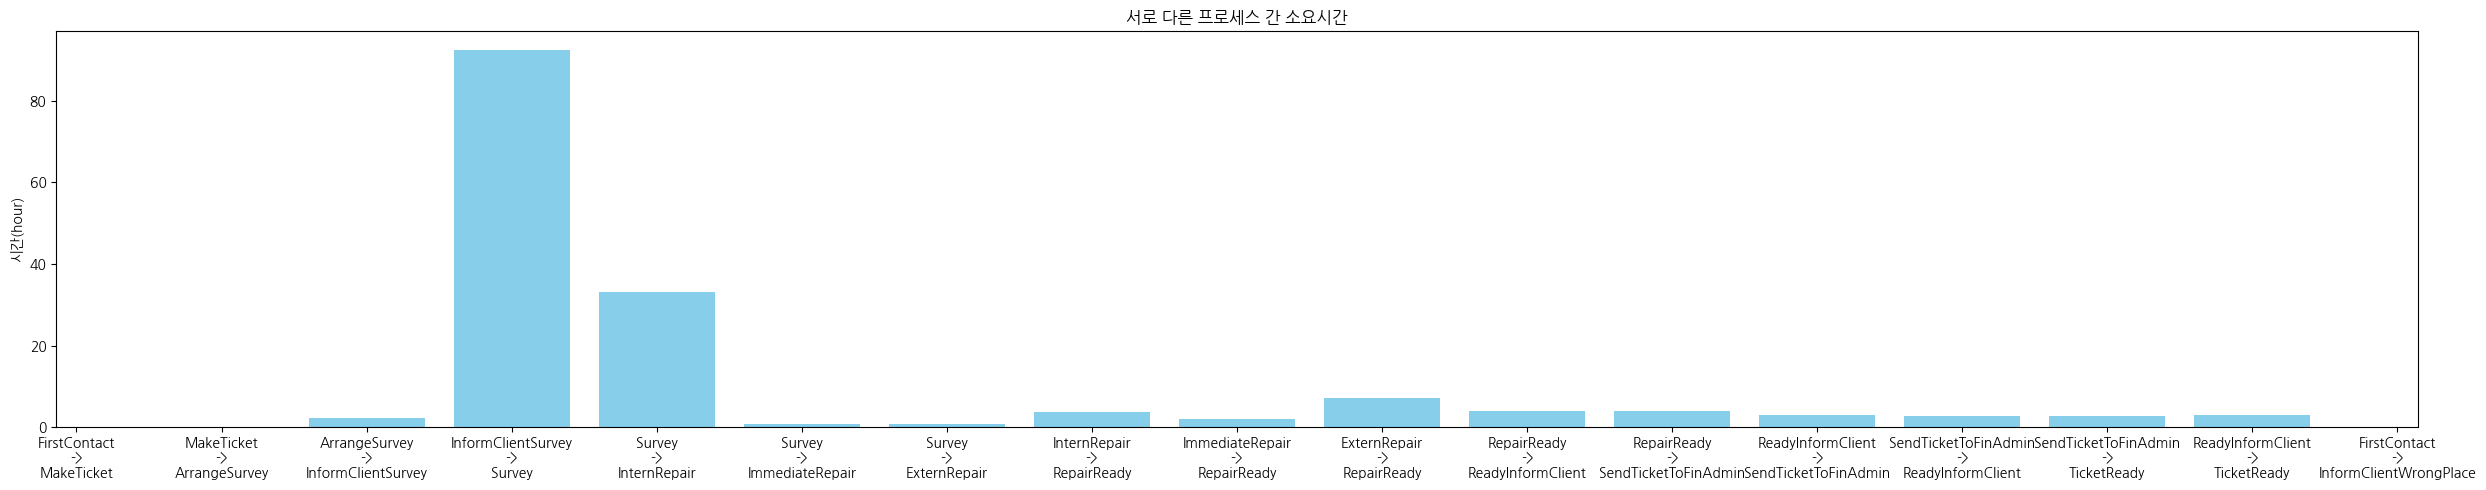

In [ ]:
import koreanize_matplotlib

plt.figure(figsize = (25, 5))
plt.bar(x_tick_list, [i/3600 for i in mean_second_list], color='skyblue')
plt.title('서로 다른 프로세스 간 소요시간')
plt.ylabel('시간(hour)')
plt.tight_layout()
plt.show()

# InformClientSurvey -> Survey와 Survey -> InternRepair 작업 사이 소요시간이 너무 크다

In [75]:
# 서로 같은 프로세스 간 소요시간
def same_process_duration(task):
    start_df = df3[(df3['taskID'] == task) & (df3['eventtype'] == 'start')][['caseID', 'taskID', 'eventtype', 'datetime']]
    complete_df = df3[(df3['taskID'] == task) & (df3['eventtype'] == 'complete')][['caseID', 'taskID', 'eventtype', 'datetime']]

    merge_df = pd.merge(start_df, complete_df, left_on='caseID', right_on='caseID', how='inner')
    duration_time = merge_df.apply(lambda x : x['datetime_y'] - x['datetime_x'], axis=1)
    return duration_time.mean()

x_tick_list2 = []
mean_second_list2 = []

for i in start_complete_task:
    mean_duration = same_process_duration(i)
    x_tick_list2.append(i)
    try:
        mean_second_list2.append(mean_duration.total_seconds())
    except:
        mean_second_list2.append(0)
    print(f"{i} : {mean_duration}")

MakeTicket : 0 days 00:04:21.743869209
ArrangeSurvey : 0 days 02:07:36.324324324
Survey : 0 days 00:40:44.879356568
InternRepair : 0 days 03:46:12.900000
ImmediateRepair : 0 days 01:54:50.400000
ExternRepair : nan


In [66]:
# ExternRepair는 확인 결과 start 밖에 없어서 소요시간 측정이 불가능
df3[df3['taskID'] == 'ExternRepair']

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime,year
1350,110,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,6:21,1970-01-03 06:21:00,1970.0
2130,172,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,14:10,1970-01-08 14:10:00,1970.0
2456,198,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01,9:38,1970-01-01 09:38:00,1970.0
3546,285,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,1:31,1970-01-08 01:31:00,1970.0
4455,358,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-12,12:56,1970-01-12 12:56:00,1970.0
4729,380,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-06,21:31,1970-01-06 21:31:00,1970.0
6641,534,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-04,10:47,1970-01-04 10:47:00,1970.0
6761,543,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-05,2:23,1970-01-05 02:23:00,1970.0
7121,572,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-13,3:17,1970-01-13 03:17:00,1970.0
7429,597,ExternRepair,FixIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,1:40,1970-01-07 01:40:00,1970.0


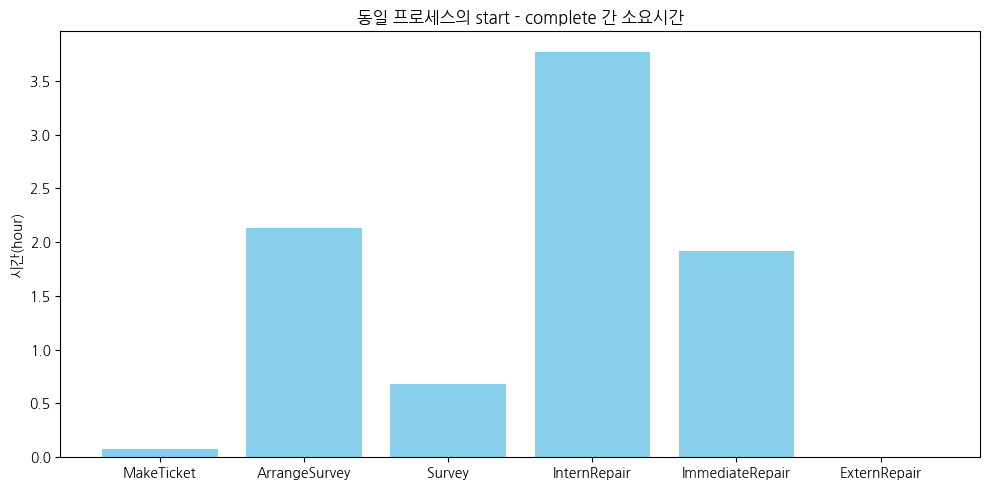

In [ ]:
plt.figure(figsize = (10, 5))
plt.bar(x_tick_list2, [i/3600 for i in mean_second_list2], color='skyblue')
plt.title('동일 프로세스의 start - complete 간 소요시간')
plt.ylabel('시간(hour)')
plt.tight_layout()
plt.show()

# InternRepair의 소요시간이 가장 크다